## Проверка статистических гипотез
### Задача 1

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

import warnings

warnings.filterwarnings("ignore")

In [222]:
df = pd.read_csv("Nursing Home Data/Nursing Home Data_data.csv", sep=";")
df.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,224,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


{'whiskers': [<matplotlib.lines.Line2D at 0x22fc3a0dd30>,
 'caps': [<matplotlib.lines.Line2D at 0x22fc3a1b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fc3a0d9a0>,
 'medians': [<matplotlib.lines.Line2D at 0x22fc3a1bbb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x22fc3a1bf40>,
 'means': []}

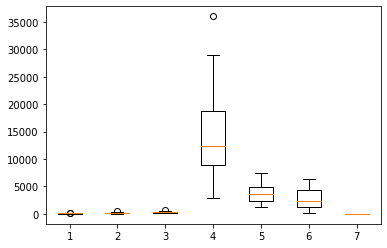

In [223]:
plt.boxplot(df)

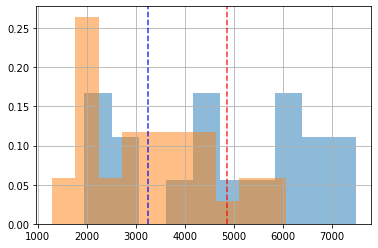

In [224]:
city_hospitals = df[df['RURAL'] == 0]
country_hospitals = df[df['RURAL'] == 1]
x = city_hospitals['NSAL']
y = country_hospitals['NSAL']
x.hist(alpha=0.5, weights=[1. / len(x)] * len(x))
y.hist(alpha=0.5, weights=[1. / len(y)] * len(y))
plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')

На гистограмме отчетливо видно, что распределения далеки от нормального. Имеется значительная асимметрия и отклонения
от колоколообразной формы. Таким образом в качестве типичного наблюдения будем рассматривать медиану. Тест Муда плохо подходит в данной ситуации, так как число наблюдений невелико.
Поэтому воспользуемся критерием Манна-Уитни.

In [225]:
res = stats.mannwhitneyu(x, y)
print("p-value: ", res[1])

p-value:  0.0017745599734812778


P-value значительно ниже уровня значимости, следовательно, основная гипотеза отвергается. Медиана зарплат медсестер для городских и загородных больниц различается.

<AxesSubplot:xlabel='NSAL'>

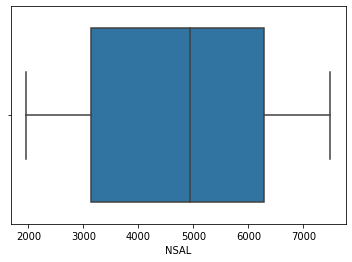

In [226]:
sns.boxplot(x, orient='h')

<AxesSubplot:xlabel='NSAL'>

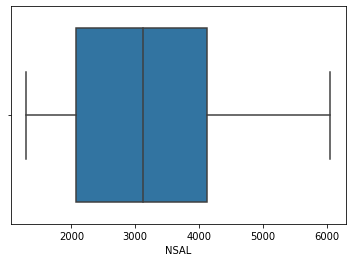

In [227]:
sns.boxplot(y, orient='h')

###  Задача №2

In [228]:
df = pd.read_csv('Unions and State Labor Law/Unions and State Labor Law_data.csv', sep='\t', index_col=0)
df.head()

,DENS,COMP,RTW,PVT
STATE,,,,
NY,56.9,1,0,31.2
MI,49.6,1,0,30.2
WA,32.4,1,0,33.1
HI,54.6,1,0,24.7
AK,30.7,1,0,30.1


<AxesSubplot:xlabel='DENS'>

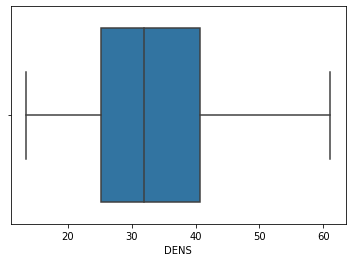

In [229]:
sns.boxplot(df['DENS'])

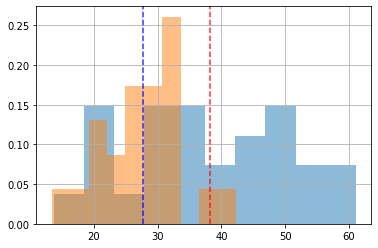

In [230]:
x = df[df['COMP'] == 1]['DENS']
y = df[df['COMP'] == 0]['DENS']
x.hist(alpha=0.5, weights=[1. / len(x)] * len(x))
y.hist(alpha=0.5, weights=[1. / len(y)] * len(y))
plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')

Как и в предыдущем случае, распределения данных далеки от нормального. Пользуясь той же логикой, будем рассматривать в качестве типичного наблюдения медиану.
Имеет смысл вновь воспользоваться критерием Манна-Уитни.

In [231]:
res = stats.mannwhitneyu(x, y)
print("p-value: ", res[1])

p-value:  0.0019653510337949466


P-value значительно ниже уровня значимости, следовательно, основная гипотеза отвергается.
Медианный процент служащих различается.

<AxesSubplot:xlabel='DENS'>

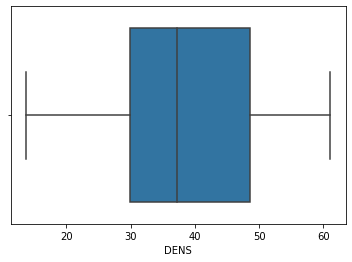

In [232]:
sns.boxplot(x, orient='h')

<AxesSubplot:xlabel='DENS'>

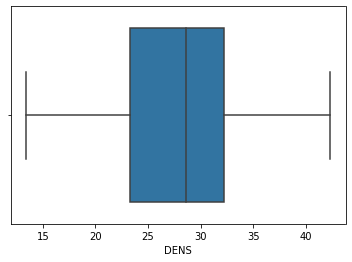

In [233]:
sns.boxplot(y, orient='h')